# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.simplefilter("ignore")

In [2]:
customer = pd.read_csv('/kaggle/input/retail-fashion-data/customer_data.csv')
product = pd.read_csv('/kaggle/input/retail-fashion-data/product_data.csv')
sales = pd.read_csv('/kaggle/input/retail-fashion-data/sales_data.csv')
store = pd.read_csv('/kaggle/input/retail-fashion-data/store_data.csv')

# Data Summary

In [3]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Compute values that are constant across columns
    total_rows = len(df)
    duplicates = df.duplicated().sum()

    # Use vectorized operations 
    dtypes = df.dtypes
    instances = df.count()
    unique = df.nunique()
    sum_null = df.isnull().sum()

    # Create the summary 
    df_check = pd.DataFrame({
        'column': df.columns,
        'dtype': dtypes,
        'instances': instances,
        'unique': unique,
        'sum_null': sum_null,
        'duplicates': duplicates  
    })

    return df_check

print("Customer Data")
display(check(customer))
display(customer.head())

print("Product Data")
display(check(product))
display(product.head())

print("Sales Data")
display(check(sales))
display(sales.head())

print("Store Data")
display(check(store))
display(store.head())

Customer Data


,column,dtype,instances,unique,sum_null,duplicates
customer_id,customer_id,object,2500,2500,0,0
age,age,int64,2500,54,0,0
gender,gender,object,2500,4,0,0
city,city,object,2500,5,0,0
email,email,object,2450,2450,50,0


,customer_id,age,gender,city,email
0,C00001,20,Female,Faro,user1@example.com
1,C00002,35,Male,Porto,user2@example.com
2,C00003,53,Other,Porto,user3@example.com
3,C00004,52,Female,Porto,NaN
4,C00005,32,Other,Lisbon,user5@example.com


Product Data


,column,dtype,instances,unique,sum_null,duplicates
product_id,product_id,object,5000,5000,0,0
category,category,object,5000,6,0,0
color,color,object,4900,6,100,0
size,size,object,5000,5,0,0
season,season,object,5000,4,0,0
supplier,supplier,object,5000,4,0,0
cost_price,cost_price,float64,5000,3606,0,0
list_price,list_price,float64,5000,4428,0,0


,product_id,category,color,size,season,supplier,cost_price,list_price
0,P00001,Bottoms,Yellow,XL,Summer,supplierc,27.66,114.26
1,P00002,Accessories,Yellow,S,Winter,supplierd,71.70,40.15
2,P00003,Tops,Blue,XS,Summer,supplierc,62.39,63.73
3,P00004,Accessories,Green,M,Fall,suppliera,32.73,68.33
4,P00005,Accessories,White,L,Summer,supplierd,17.53,51.66


Sales Data


,column,dtype,instances,unique,sum_null,duplicates
transaction_id,transaction_id,object,5000,5000,0,0
date,date,object,5000,601,0,0
product_id,product_id,object,5000,3165,0,0
store_id,store_id,object,5000,6,0,0
customer_id,customer_id,object,4801,2152,199,0
quantity,quantity,int64,5000,4,0,0
discount,discount,float64,4767,4,233,0
returned,returned,int64,5000,2,0,0


,transaction_id,date,product_id,store_id,customer_id,quantity,discount,returned
0,T000001,2022-09-13,P04687,S004,C02488,4,0.1,1
1,T000002,2022-05-08,P02631,S004,C01553,1,0.1,0
2,T000003,2023-03-07,P04644,S002,C00093,3,0.0,1
3,T000004,2022-09-19,P04654,S003,C01614,1,0.2,0
4,T000005,2023-05-25,P00224,S003,NaN,4,NaN,0


Store Data


,column,dtype,instances,unique,sum_null,duplicates
store_id,store_id,object,5,5,0,0
store_name,store_name,object,5,5,0,0
region,region,object,5,5,0,0
store_size_m2,store_size_m2,int64,5,5,0,0


,store_id,store_name,region,store_size_m2
0,S001,Lisbon Flagship,Lisbon,768
1,S002,Porto Center,Porto,162
2,S003,Faro Outlet,Algarve,782
3,S004,Online,Online,538
4,S005,Coimbra Boutique,Coimbra,646


# Merge Dataframes 

In [6]:
# Join Strategy how="left": Keeps all transactions, even if product/store/customer has invalid/missing IDs.

# Merge sales with product info
merged_df = sales.merge(product, on="product_id", how="left")

# Merge store info
merged_df = merged_df.merge(store, on="store_id", how="left")

# Merge customer info
merged_df = merged_df.merge(customer, on="customer_id", how="left")

merged_df.head()

,transaction_id,date,product_id,store_id,customer_id,quantity,discount,returned,category,color,...,supplier,cost_price,list_price,store_name,region,store_size_m2,age,gender,city,email
0,T000001,2022-09-13,P04687,S004,C02488,4,0.1,1,Bottoms,White,...,suppliera,8.79,139.57,Online,Online,538.0,19.0,Male,Coimbra,user2488@example.com
1,T000002,2022-05-08,P02631,S004,C01553,1,0.1,0,Shoes,Red,...,suppliera,35.51,165.42,Online,Online,538.0,30.0,Female,Lisbon,user1553@example.com
2,T000003,2023-03-07,P04644,S002,C00093,3,0.0,1,Tops,White,...,supplierb,58.33,121.71,Porto Center,Porto,162.0,19.0,Other,Lisbon,NaN
3,T000004,2022-09-19,P04654,S003,C01614,1,0.2,0,Dresses,Blue,...,supplierd,22.93,126.03,Faro Outlet,Algarve,782.0,47.0,Male,Porto,user1614@example.com
4,T000005,2023-05-25,P00224,S003,NaN,4,NaN,0,Bottoms,White,...,supplierd,43.34,144.86,Faro Outlet,Algarve,782.0,NaN,NaN,NaN,NaN


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  5000 non-null   object 
 1   date            5000 non-null   object 
 2   product_id      5000 non-null   object 
 3   store_id        5000 non-null   object 
 4   customer_id     4801 non-null   object 
 5   quantity        5000 non-null   int64  
 6   discount        4767 non-null   float64
 7   returned        5000 non-null   int64  
 8   category        4980 non-null   object 
 9   color           4873 non-null   object 
 10  size            4980 non-null   object 
 11  season          4980 non-null   object 
 12  supplier        4980 non-null   object 
 13  cost_price      4980 non-null   float64
 14  list_price      4980 non-null   float64
 15  store_name      4980 non-null   object 
 16  region          4980 non-null   object 
 17  store_size_m2   4980 non-null   f

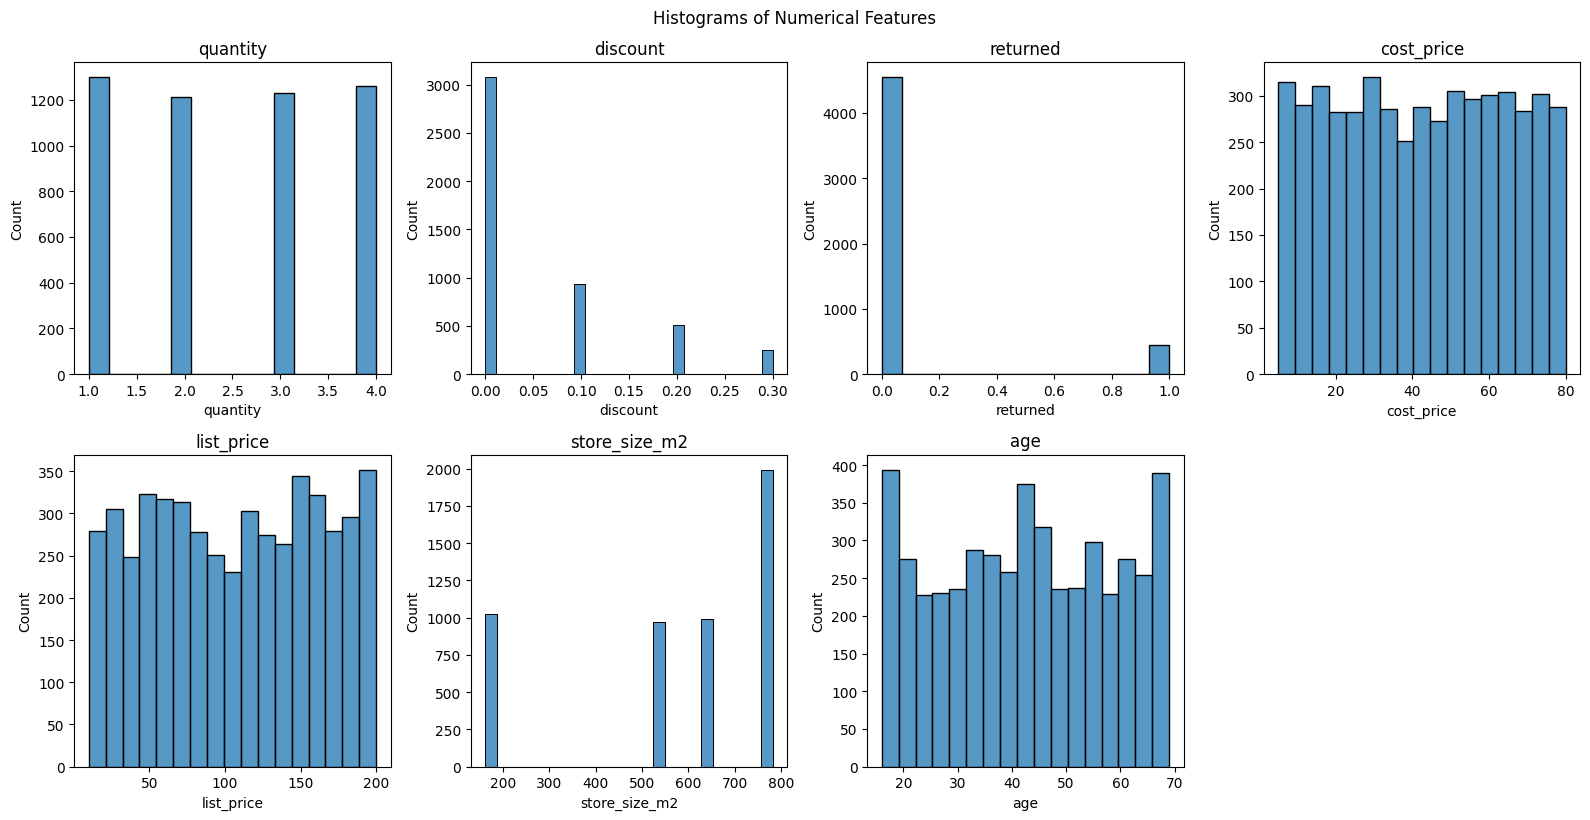

In [12]:
# Numerical features
numerical_features = merged_df.select_dtypes(include=['float64', 'int64','int64']).columns

# Determine number of rows and columns for the grid
num_features = len(numerical_features)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(merged_df[feature], ax=axes[i], kde=False)
    axes[i].set_title(feature)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', y=1.02)  
plt.show()